In [82]:
import csv
import random
import matplotlib.pyplot as plt

#csv reader
def read_data(filename):
    with open(filename, 'r') as file:
        reader = csv.reader(file)
        data = list(reader)
    return [(float(row[0]), float(row[1])) for row in data]

In [83]:
#calculate the Euclidean / straight-line distance distance between two points
def euclidean_distance(point1, point2):
    x1, y1 = point1
    x2, y2 = point2
    return ((x2 - x1) ** 2 + (y2 - y1) ** 2) ** 0.5

In [84]:
#calculate the total distance of a given order of points
def total_distance(points, order):
    total = 0
    for i in range(len(order) - 1):
        point1 = points[order[i]]
        point2 = points[order[i + 1]]
        total += euclidean_distance(point1, point2)
    return total


In [85]:
# #perform steepest ascent / descent hill climbing for TSP -Using the swap operator
# def steepest_ascent_descent_hill_climbing(points):
#     current_order = list(range(len(points)))
#     best_order = current_order[:]
#     best_distance = total_distance(points, current_order)

#     while True:
#         #generate all possible neighbouring solutions
#         neighbors = []
#         for i in range(len(points) - 1):
#             for j in range(i + 1, len(points)):
#                 neighbor = current_order[:]
#                 neighbor[i], neighbor[j] = neighbor[j], neighbor[i]
#                 neighbors.append(neighbor)

#         found_better = False
#         for neighbor in neighbors:
#             distance = total_distance(points, neighbor)
#             if distance < best_distance:
#                 best_distance = distance
#                 best_order = neighbor
#                 found_better = True

#         if not found_better:
#             break

#         current_order = best_order[:]

#     return best_order
# #perform steepest ascent / descent hill climbing for TSP -Using the inversion operator
# def steepest_ascent_descent_hill_climbing(points):
#     current_order = list(range(len(points)))
#     best_order = current_order[:]
#     best_distance = total_distance(points, current_order)

#     while True:
#         # Generate all possible neighboring solutions using the inversion operator
#         neighbors = []
#         for i in range(len(points) - 1):
#             for j in range(i + 1, len(points)):
#                 neighbor = current_order[:]
#                 neighbor[i:j + 1] = reversed(neighbor[i:j + 1])
#                 neighbors.append(neighbor)

#         found_better = False
#         for neighbor in neighbors:
#             distance = total_distance(points, neighbor)
#             if distance < best_distance:
#                 best_distance = distance
#                 best_order = neighbor
#                 found_better = True

#         if not found_better:
#             break

#         current_order = best_order[:]

#     return best_order
#perform steepest ascent / descent hill climbing for TSP -Using the 2-opt operator
def steepest_ascent_descent_hill_climbing(points):
    current_order = list(range(len(points)))
    best_order = current_order[:]
    best_distance = total_distance(points, current_order)

    while True:
        # Generate all possible neighboring solutions using the 2-opt operator
        neighbors = []
        for i in range(len(points) - 1):
            for j in range(i + 1, len(points)):
                neighbor = current_order[:]
                neighbor[i:j + 1] = reversed(neighbor[i:j + 1])
                neighbors.append(neighbor)

        found_better = False
        for neighbor in neighbors:
            distance = total_distance(points, neighbor)
            if distance < best_distance:
                best_distance = distance
                best_order = neighbor
                found_better = True

        if not found_better:
            break

        current_order = best_order[:]

    return best_order



In [86]:
#Run the algorithm multiple times and return the best orders
def run_algorithm(points, num_runs):
    best_orders = []
    for _ in range(num_runs):
        random.shuffle(points)
        best_order = steepest_ascent_descent_hill_climbing(points)
        best_orders.append(best_order)
    return best_orders



In [87]:
#Plot the TSP Solution

def plot_tsp(points, order):
    x = [point[0] for point in points]
    y = [point[1] for point in points]
    plt.plot(x, y, 'bo-')
    for i in range(len(order) - 1):
        start = order[i]
        end = order[i + 1]
        plt.plot([points[start][0], points[end][0]], [points[start][1], points[end][1]], 'r-')
    plt.plot([points[order[-1]][0], points[order[0]][0]], [points[order[-1]][1], points[order[0]][1]], 'r-')
    plt.xlabel('X-coordinate')
    plt.ylabel('Y -coordinate')
    plt.title('TSP Solution')
    plt.show()

Run 1: Distance = 81.21983814042129
Run 2: Distance = 70.08858404750984
Run 3: Distance = 69.82150624490511
Run 4: Distance = 81.14248902001236
Run 5: Distance = 82.66049357354672
Run 6: Distance = 84.60001477164445
Run 7: Distance = 81.79742173318249
Run 8: Distance = 77.39862646250195
Run 9: Distance = 74.88920839651435
Run 10: Distance = 18.54565607769608


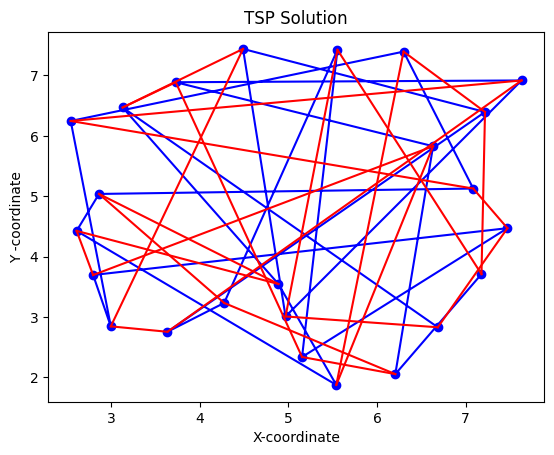

In [88]:
#main function

if __name__ == '__main__':
      # Define the input filename and number of runs
    filename = 'TSPMatrix.csv'
     # Read the data from the csv file
    points = read_data(filename)
    num_runs = 10
    # Run the algorithm and get the best orders
    best_orders = run_algorithm(points, num_runs)
    # Print the results for each run
    for i, order in enumerate(best_orders):
        distance = total_distance(points, order)
        print(f'Run {i + 1}: Distance = {distance}')

    # best_order = min(best_orders, key=lambda order: total_distance(points, order))
    best_orders = run_algorithm(points, num_runs)
    plot_tsp(points, best_order)
